In [1]:
import numpy as np


def load_word_vectors(file_path):
    word_to_id = {}
    vectors = []
    with open(file_path, 'r', encoding='utf-8') as f:
        next(f)
#         n = true
        for line in f:
            parts = line.strip().split(' ')
            word = parts[0]
            vector = np.array([float(x) for x in parts[1:]], dtype=np.float32)
#             if n:
#                 print(len(parts))
#                 print(parts)
#                 print(word)
#                 print(len(vector))
#             n = false
            if word not in word_to_id:
                word_to_id[word] = len(word_to_id)
                vectors.append(vector)
    vectors_matrix = np.stack(vectors)
    return word_to_id, vectors_matrix

In [2]:
file_path = r"F:\NNNNNNNNNNNNNNLP\ctb.50d.vec"
word_to_id, vectors_matrix = load_word_vectors(file_path)
print("词向量矩阵的形状:", vectors_matrix.shape)
print('词语姚明对应的下标：',word_to_id['姚明'])
print('词语姚明对应的词向量',vectors_matrix[word_to_id['姚明']])

词向量矩阵的形状: (704367, 50)
词语姚明对应的下标： 7209
词语姚明对应的词向量 [ 0.304858  0.91963  -0.231167  0.539078  0.367755  0.969618  0.167328
 -0.226733 -0.010583 -1.16883   0.589022 -0.128294  0.155056  0.174965
  0.343108 -0.287344  0.408424  0.175161  0.127991  0.081932 -0.22609
  0.204822  0.71623  -0.371495  1.357867  0.018136  0.036817  0.451872
  0.511137  0.671197  0.440072 -0.223477 -1.159685  0.060521 -0.792111
 -0.56052  -0.197526 -0.262771  0.500849 -0.435863 -0.259254 -0.612393
 -1.159365  0.019793 -0.417968  0.457342 -0.042911  0.911493 -0.293664
  0.284489]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

def visualize_word_vectors(file_path, method='PCA'):
    word_to_id, vectors_matrix = load_word_vectors(file_path)
    selected_vectors = vectors_matrix[:300]
    print(selected_vectors.shape)

    if method == 'PCA':
        pca = PCA(n_components=2)
        reduced_vectors = pca.fit_transform(selected_vectors)
    elif method == 't-SNE':
        tsne = TSNE(n_components=2, random_state=42)
        reduced_vectors = tsne.fit_transform(selected_vectors)
    else:
        raise ValueError("There is no way!——the futurer")
        
    print(reduced_vectors.shape)
    colors = [plt.cm.tab20(random.randint(0, 19)) for _ in range(300)]
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=colors)
    plt.title(f"{method} visualization of word vectors")
    plt.show()

(300, 50)
(300, 2)


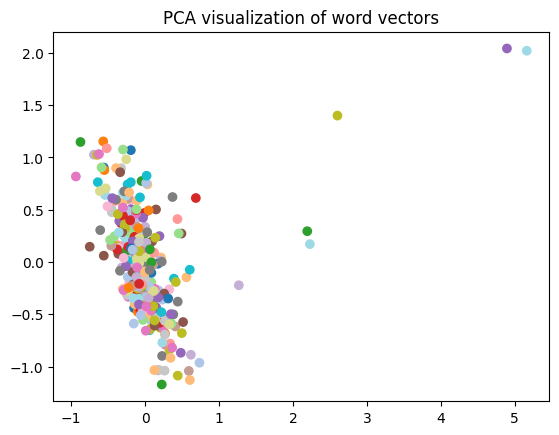

In [39]:
visualize_word_vectors(file_path, method='PCA')

(300, 50)
(300, 2)


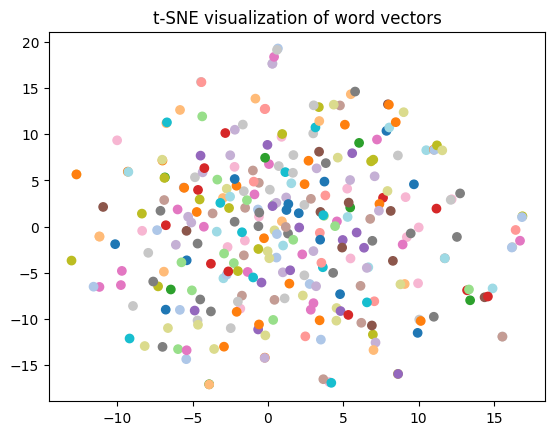

In [42]:
import warnings
warnings.filterwarnings('ignore')
visualize_word_vectors(file_path, method='t-SNE')

In [47]:
def cos_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

def find_most_similar_words(file_path, test_words):
    word_to_id, vectors_matrix = load_word_vectors(file_path)
    test_word_vectors = [vectors_matrix[word_to_id[word]] for word in test_words if word in word_to_id]
    all_word_vectors = vectors_matrix
    similarity_results = []
    for test_vec in test_word_vectors:
        similarities = []
        for i in range(len(all_word_vectors)):
            similarity = cos_similarity(test_vec, all_word_vectors[i])
            similarities.append((i, similarity))
        similarities.sort(key=lambda x: x[1], reverse=True)
        top_10_similar = [(list(word_to_id.keys())[idx], sim) for idx, sim in similarities[1:11]]
        similarity_results.append(top_10_similar)
    return similarity_results

In [48]:
test_words = ["苹果", "美丽", "跑步"]
results = find_most_similar_words(file_path, test_words)
for i, word in enumerate(test_words):
    print(f"与'{word}'最相似的前10个词：")
    for similar_word, similarity in results[i]:
        print(f"{similar_word}: {similarity}")
    print()

3
与'苹果'最相似的前10个词：
(Apple: 0.7649582028388977
iPOD: 0.7587112188339233
Computer): 0.7523359060287476
灏景湾: 0.751377284526825
:¤: 0.7372256517410278
HENRY: 0.7365961670875549
(Apple): 0.7313573360443115
橘子: 0.7312873005867004
电脑i: 0.729816198348999
林檎: 0.729118824005127

与'美丽'最相似的前10个词：
迷人: 0.8506073951721191
美景: 0.8488399386405945
风情万种: 0.838850736618042
爱恋: 0.8359888792037964
越夜越: 0.8359544277191162
意象,: 0.8358688950538635
密意: 0.832885205745697
花香: 0.8290963172912598
灿烂: 0.8283603191375732
容颜: 0.826234757900238

与'跑步'最相似的前10个词：
慢跑: 0.9000599980354309
快走: 0.8865740299224854
跑;: 0.868120014667511
练长: 0.86790531873703
慢走: 0.8638103008270264
仰卧: 0.858726441860199
举哑铃: 0.8351306915283203
跑: 0.8349247574806213
做体: 0.8310585618019104
起坐: 0.8308548331260681



In [8]:
stopwords = [] 
with open(r"F:\NNNNNNNNNNNNNNLP\shiyan1\dataSet\stop_words.txt",encoding='utf-8') as f:
        for line in f:
            stopwords.append(line.replace('\n', ''))

In [16]:
import jieba
from collections import Counter

def text_to_word_vectors(file_path, word_to_id, vectors_matrix):
    contents, labels = read_file(file_path)
    texts = []
    for content in contents:
        words = jieba.lcut(content)
        # words = drop_stopwords(words, stopwords)
        text_vector = np.zeros((vectors_matrix.shape[1],), dtype=np.float32)
        word_count = Counter()
        for word in words:
            if word in word_to_id:
                word_index = word_to_id[word]
                word_vector = vectors_matrix[word_index]
                text_vector += word_vector
                word_count[word] += 1
            else:
                continue
        if word_count:
            text_vector /= sum(word_count.values())
        texts.append(text_vector)
    return texts, labels


def read_file(filename):
    contents, labels = [], []
    first_line = True
    num = 0
    with open(filename, encoding='utf-8') as f:
        for line in f:
            if first_line:
                first_line = False
                continue
            try:
                num += 1
                label, content = line.strip().split('\t')
                if content:
                    contents.append(content)
                    labels.append(label)
            except:
                pass
    return contents, labels

def drop_stopwords(line, stopwords):
    line_clean = []
    for word in line:
        if word in stopwords:
            continue
        line_clean.append(word)
    return line_clean

In [17]:
import warnings
warnings.filterwarnings('ignore')

thucsnews_file = r"F:\NNNNNNNNNNNNNNLP\thucnews_part_cutted.csv"
word_to_id, vectors_matrix = load_word_vectors(file_path)
article_vectors, article_labels = text_to_word_vectors(thucsnews_file, word_to_id, vectors_matrix)
print("第一篇文章的向量表示形状:", len(article_vectors[0]))
print("所对应标签为：",article_labels[0])
print("处理后的文章向量数量:", len(article_vectors))
print("文章标签数量:", len(article_labels))

第一篇文章的向量表示形状: 50
所对应标签为： 体育
处理后的文章向量数量: 42014
文章标签数量: 42014


In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(article_labels)
def get_integer_mapping(le):
    res = {}
    for cl in le.classes_:
        res.update({le.transform([cl])[0]:cl})
    return res
map_label = get_integer_mapping(le)
print(map_label)
labels_train=le.transform(article_labels)
print(labels_train)

{0: '体育', 1: '娱乐', 2: '家居', 3: '彩票', 4: '房产', 5: '教育', 6: '时尚', 7: '时政', 8: '星座', 9: '游戏', 10: '社会', 11: '科技', 12: '股票', 13: '财经'}
[ 0  0  0 ... 13 13 13]


In [39]:
#原始组
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

article_vectors_tensor = torch.from_numpy(np.array(article_vectors)).float()
article_labels_tensor = torch.tensor(labels_train).long()

total_size = len(article_vectors)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

generator = torch.Generator().manual_seed(527)
train_vectors, val_vectors, test_vectors = random_split(article_vectors_tensor,
                                                        [train_size, val_size, test_size],
                                                        generator=generator)
train_labels, val_labels, test_labels = random_split(article_labels_tensor,
                                                      [train_size, val_size, test_size],
                                                      generator=generator)

print(train_labels[:10])

train_dataset = TensorDataset(train_vectors.dataset, train_labels.dataset)
val_dataset = TensorDataset(val_vectors.dataset, val_labels.dataset)
test_dataset = TensorDataset(test_vectors.dataset, test_labels.dataset)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

tensor([ 3,  3,  1,  2,  7,  5, 12,  0, 10,  6])


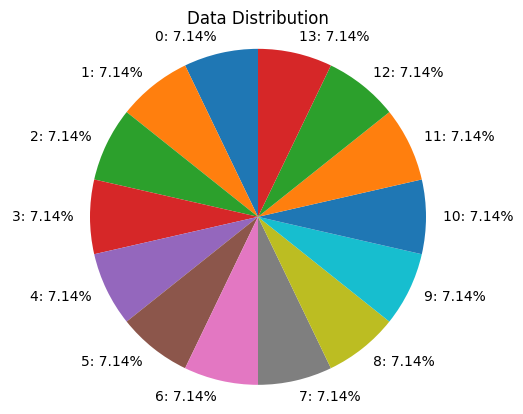

In [46]:
import matplotlib.pyplot as plt
from collections import Counter

train_labels_list = [label.item() for _, label in train_dataset]
label_counts = Counter(train_labels_list)

labels = list(label_counts.keys())
data_amounts = list(label_counts.values())

total_amount = sum(data_amounts)
percentages = ["{:.2f}%".format((count / total_amount) * 100) for count in data_amounts]

wedges, texts, autotexts = plt.pie(data_amounts, labels=labels, autopct='', startangle=90)
for i, p in enumerate(percentages):
    # 使用str()函数将labels[i]转换为字符串类型，这样就能和后面的字符串正常拼接了
    texts[i].set_text(str(labels[i]) + ": " + p)

plt.axis('equal')
plt.title('Data Distribution')
plt.savefig(r'C:\Users\86178\Desktop\sxt.jpg')
plt.show()

In [24]:
# 降维组
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np
from sklearn.manifold import TSNE

article_vectors = np.array(article_vectors)
print("降维前长度：",len(article_vectors[0]))
tsne = TSNE(n_components=2, random_state=42)
article_vectors_reduced = tsne.fit_transform(article_vectors)
print("降维后长度：",len(article_vectors_reduced[0]))

article_vectors_tensor = torch.from_numpy(article_vectors_reduced).float()
article_labels_tensor = torch.tensor(labels_train).long()

total_size = len(article_vectors_reduced)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

generator = torch.Generator().manual_seed(527)
train_vectors, val_vectors, test_vectors = random_split(article_vectors_tensor,
                                                        [train_size, val_size, test_size],
                                                        generator=generator)
train_labels, val_labels, test_labels = random_split(article_labels_tensor,
                                                      [train_size, val_size, test_size],
                                                      generator=generator)

print(train_labels[:10])

train_dataset = TensorDataset(train_vectors.dataset, train_labels.dataset)
val_dataset = TensorDataset(val_vectors.dataset, val_labels.dataset)
test_dataset = TensorDataset(test_vectors.dataset, test_labels.dataset)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

降维前长度： 50
降维后长度： 2
tensor([ 3,  3,  1,  2,  7,  5, 12,  0, 10,  6])


In [19]:
import torch.nn.functional as F
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x
    
input_size = article_vectors_tensor.shape[1]
print(input_size)
num_classes = len(set(article_labels))
print("物以类聚，人以群分：", num_classes)
model = Model(input_size, 128, num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

50
物以类聚，人以群分： 14
cuda


Epoch 1: Train Loss: 1.2670, Train Accuracy: 0.6239, Val Loss: 1.0727, Val Accuracy: 0.6756
*******************************************
Epoch 2: Train Loss: 0.9654, Train Accuracy: 0.7257, Val Loss: 0.8920, Val Accuracy: 0.7532
*******************************************
Epoch 3: Train Loss: 0.8666, Train Accuracy: 0.7666, Val Loss: 0.8814, Val Accuracy: 0.7544
*******************************************
Epoch 4: Train Loss: 0.8129, Train Accuracy: 0.7839, Val Loss: 0.7651, Val Accuracy: 0.8101
*******************************************
Epoch 5: Train Loss: 0.7712, Train Accuracy: 0.7990, Val Loss: 0.7493, Val Accuracy: 0.8008
*******************************************
Epoch 6: Train Loss: 0.7437, Train Accuracy: 0.8071, Val Loss: 0.7210, Val Accuracy: 0.7978
*******************************************
Epoch 7: Train Loss: 0.7228, Train Accuracy: 0.8147, Val Loss: 0.6897, Val Accuracy: 0.8196
*******************************************
Epoch 8: Train Loss: 0.7093, Train Accuracy: 0.8

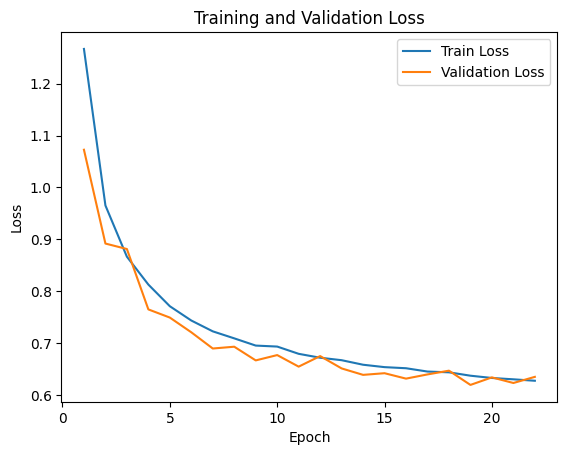

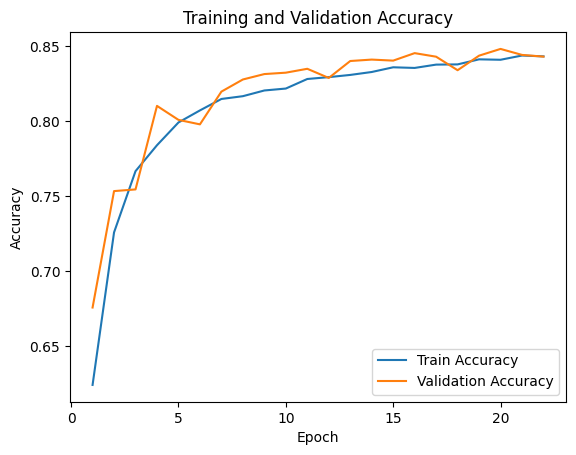

In [26]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

num_epochs = 27
best_val_loss = float('inf')
patience = 3
wait = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

time_begin = time.time()
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_preds = []
    train_labels_all = []
    for batch_vectors, batch_labels in train_loader:
        batch_vectors, batch_labels = batch_vectors.to(device), batch_labels.to(device)
        optimizer.zero_grad()
        outputs = model(batch_vectors)
        outputs_log = torch.log(outputs)
        loss = criterion(torch.log(outputs), batch_labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_vectors.size(0)

        _, predicted = torch.max(outputs.data, 1)
        train_preds.extend(predicted.cpu().numpy())
        train_labels_all.extend(batch_labels.cpu().numpy())
    train_loss /= len(train_loader.dataset)
    train_accuracy = accuracy_score(train_labels_all, train_preds)

    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch_vectors, batch_labels in val_loader:
            batch_vectors, batch_labels = batch_vectors.to(device), batch_labels.to(device)
            outputs = model(batch_vectors)
            loss = criterion(torch.log(outputs), batch_labels)
            val_loss += loss.item() * batch_vectors.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(batch_labels.cpu().numpy())
    val_loss /= len(val_loader.dataset)
    val_accuracy = accuracy_score(val_labels, val_preds)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    print("*******************************************")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break
            
time_end = time.time()
print("训练用时：",time_begin-time_end)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Accuracy: 0.8430, Recall: 0.8430, F1 Score: 0.8431
Class	Precision	Recall		F1 Score	Support
0	0.9939		0.9707		0.9821		3001
1	0.9404		0.9357		0.9380		3001
2	0.8737		0.8481		0.8607		3001
3	0.9348		0.9077		0.9210		3001
4	0.7617		0.8690		0.8118		3001
5	0.8491		0.7857		0.8162		3001
6	0.8842		0.7937		0.8365		3001
7	0.8312		0.7924		0.8113		3001
8	0.8058		0.9474		0.8709		3001
9	0.9246		0.7311		0.8165		3001
10	0.8078		0.7591		0.7827		3001
11	0.7021		0.8867		0.7837		3001
12	0.8195		0.8564		0.8375		3001
13	0.7517		0.7181		0.7345		3001


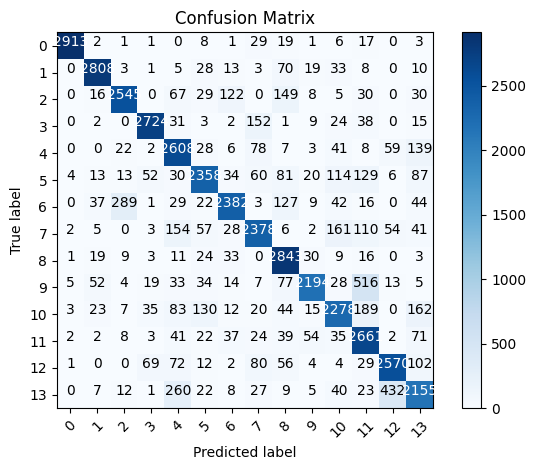

In [27]:
import itertools
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
model.eval()
test_preds = []
test_labels = []
with torch.no_grad():
    for batch_vectors, batch_labels in test_loader:
        batch_vectors, batch_labels = batch_vectors.to(device), batch_labels.to(device)
        outputs = model(batch_vectors)
        _, predicted = torch.max(outputs.data, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(batch_labels.cpu().numpy())

accuracy = accuracy_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds, average='macro')
f1 = f1_score(test_labels, test_preds, average='macro')
print(f"Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

precision_per_class = precision_score(test_labels, test_preds, average=None)
recall_per_class = recall_score(test_labels, test_preds, average=None)
f1_per_class = f1_score(test_labels, test_preds, average=None)
support_per_class = np.bincount(test_labels)

num_classes = len(set(test_labels))
class_names = [str(i) for i in range(num_classes)]

print("Class\tPrecision\tRecall\t\tF1 Score\tSupport")
for i in range(num_classes):
    print(f"{class_names[i]}\t{precision_per_class[i]:.4f}\t\t{recall_per_class[i]:.4f}\t\t{f1_per_class[i]:.4f}\t\t{support_per_class[i]}")

cm = confusion_matrix(test_labels, test_preds)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()